In [149]:
print("""
 .d888888   888888ba   a88888b. dP     dP  dP 8888ba.88ba   88888888b 888888ba   88888888b .d88888b
d8'    88   88    `8b d8'   `88 88     88  88 88  `8b  `8b  88        88    `8b  88        88.    "'
88aaaaa88a a88aaaa8P' 88        88aaaaa88a 88 88   88   88 a88aaaa    88     88 a88aaaa    `Y88888b.
88     88   88   `8b. 88        88     88  88 88   88   88  88        88     88  88              `8b
88     88   88     88 Y8.   .88 88     88  88 88   88   88  88        88    .8P  88        d8'   .8P
88     88   dP     dP  Y88888P' dP     dP  dP dP   dP   dP  88888888P 8888888P   88888888P  Y88888P

The development of the ARCHIMEDES project, centered around a Satelite
Solar Powered Particle Beam System (USPL-Ultrashort Pulse Laser),
represents a significant advancement in strategic defense technologies.
This project not only showcases cutting-edge research in the field of laser
physics but also addresses the evolving needs of modern military operations,
emphasizing precision, minimal collateral damage, and the ability to counteract
a wide range of threats from a sage distance.
""")



 .d888888   888888ba   a88888b. dP     dP  dP 8888ba.88ba   88888888b 888888ba   88888888b .d88888b
d8'    88   88    `8b d8'   `88 88     88  88 88  `8b  `8b  88        88    `8b  88        88.    "'
88aaaaa88a a88aaaa8P' 88        88aaaaa88a 88 88   88   88 a88aaaa    88     88 a88aaaa    `Y88888b.
88     88   88   `8b. 88        88     88  88 88   88   88  88        88     88  88              `8b
88     88   88     88 Y8.   .88 88     88  88 88   88   88  88        88    .8P  88        d8'   .8P
88     88   dP     dP  Y88888P' dP     dP  dP dP   dP   dP  88888888P 8888888P   88888888P  Y88888P

The development of the ARCHIMEDES project, centered around a Satelite 
Solar Powered Particle Beam System (USPL-Ultrashort Pulse Laser),
represents a significant advancement in strategic defense technologies.
This project not only showcases cutting-edge research in the field of laser
physics but also addresses the evolving needs of modern military operations,
emphasizing precision, minimal c

In [209]:
#!pip install scikit-fuzzy

  Preparing metadata (setup.py) ... done
  Created wheel for fuzzylogic: filename=fuzzylogic-1.2.0-py3-none-any.whl size=18427 sha256=d318999d6e65368a6bba245ea46b7f52d36709936037325b56efea099a04ea6d
  Stored in directory: /root/.cache/pip/wheels/dd/52/8a/026f2d0fd79e5f859db10dd0180047f1d88fe5be4455308c22
Successfully built fuzzylogic


![Example Image](https://external-preview.redd.it/vJFoZi77VAhxtAkf74Q1M03YZdFnfpYhxIbN84jWEsA.jpg?auto=webp&s=3544bcb4db95e9bdd6fdf0de77c3c77d3264b8cf)

In [225]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from matplotlib.lines import lineStyles

# Create Antecedents and Consequent

In [227]:
wavelength = ctrl.Antecedent(np.arange(400, 2001, 1), 'Wavelength')  # Wavelength in nanometers
pulsePower = ctrl.Antecedent(np.arange(0, 5001, 1), 'PulsePower')  # Pulse Peak Power in terawatts


In [228]:
operationalMode = ctrl.Consequent(np.arange(0, 4, 1), 'OperationalMode')  # 0: Standby, 1: Ablation, 2: Sensor Blinding, 3: Electronic Overload


# Define membership functions for Antecedents and Consequent

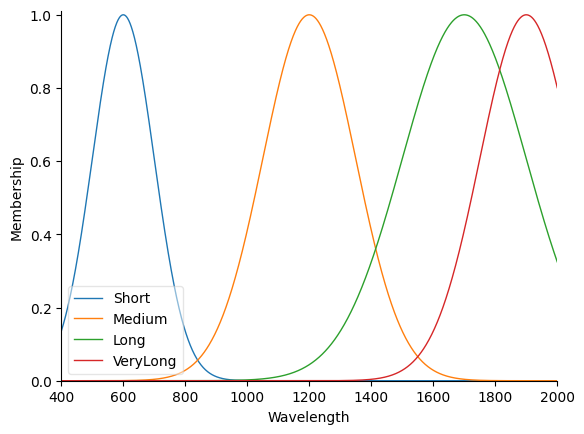

In [229]:
# Wavelength in nanometers with gaussian membership functions to represent bell shape distributions

wavelength['Short'] = fuzz.gaussmf(wavelength.universe, 600, 100)  # Mean at 600 nm, Standard Deviation 100
wavelength['Medium'] = fuzz.gaussmf(wavelength.universe, 1200, 150)  # Mean at 1200 nm, Standard Deviation 150
wavelength['Long'] = fuzz.gaussmf(wavelength.universe, 1700, 200)  # Mean at 1700 nm, Standard Deviation 200
wavelength['VeryLong'] = fuzz.gaussmf(wavelength.universe, 1900, 150)  # Mean at 1900 nm, Standard Deviation 150

wavelength.view()
plt.savefig('wavelength_membership.png')

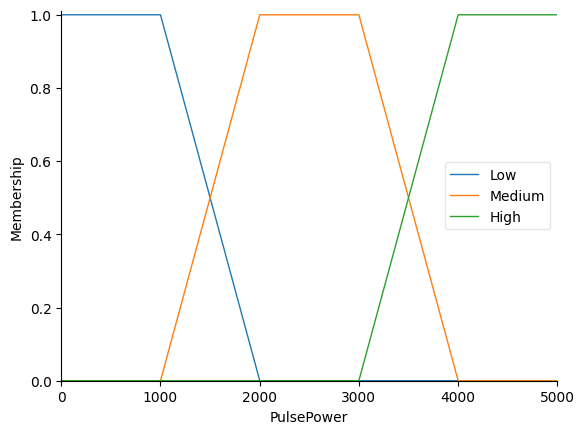

In [230]:
# Pulse Peak Power in terawatts
pulsePower['Low'] = fuzz.trapmf(pulsePower.universe, [0, 0, 1000, 2000])
pulsePower['Medium'] = fuzz.trapmf(pulsePower.universe, [1000, 2000, 3000, 4000])
pulsePower['High'] = fuzz.trapmf(pulsePower.universe, [3000, 4000, 5000, 5000])

pulsePower.view()
plt.savefig('pulsePower_membership.png')

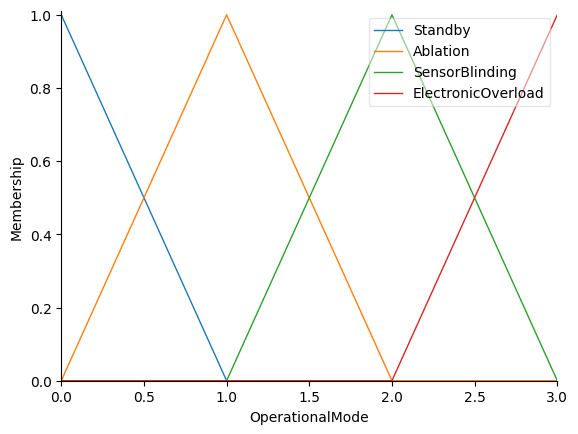

In [231]:
# Operational Mode with triangular membership functions

operationalMode['Standby'] = fuzz.trimf(operationalMode.universe, [0, 0, 0.5])
operationalMode['Ablation'] = fuzz.trimf(operationalMode.universe, [0.25, 1, 1.75])
operationalMode['SensorBlinding'] = fuzz.trimf(operationalMode.universe, [1.5, 2, 2.5])
operationalMode['ElectronicOverload'] = fuzz.trimf(operationalMode.universe, [2.25, 3, 3])

operationalMode.view()
plt.savefig('operationalMode_membership.png')


# Create rules for the Fuzzy System

In [238]:
# Rules combining Wavelength and PulsePower for OperationalMode

# short rules with graduation in pulse power
rule1 = ctrl.Rule(wavelength['Short'] & pulsePower['Low'], operationalMode['Standby'])
rule2 = ctrl.Rule(wavelength['Short'] & pulsePower['Medium'], operationalMode['SensorBlinding'])
rule3 = ctrl.Rule(wavelength['Short'] & pulsePower['High'], operationalMode['Ablation'])

# medium rules with graduation in pulse power
rule4 = ctrl.Rule(wavelength['Medium'] & pulsePower['Low'], operationalMode['Standby'])
rule5 = ctrl.Rule(wavelength['Medium'] & pulsePower['Medium'], operationalMode['SensorBlinding'])
rule6 = ctrl.Rule(wavelength['Medium'] & pulsePower['High'], operationalMode['Ablation'])

#Long waves with graduation pulse power
rule7 = ctrl.Rule(wavelength['Long'] & pulsePower['Low'], operationalMode['Standby'])
rule8 = ctrl.Rule(wavelength['Long'] & pulsePower['Medium'], operationalMode['SensorBlinding'])
rule9 = ctrl.Rule(wavelength['Long'] & pulsePower['High'], operationalMode['ElectronicOverload'])


In [239]:
# Create a simulation of the control system

archimedes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
archimedes_sim = ctrl.ControlSystemSimulation(archimedes_ctrl)

# Example 1: Low Wavelength, Medium PulsePower

Example 1 Output: 1.9999999999999998


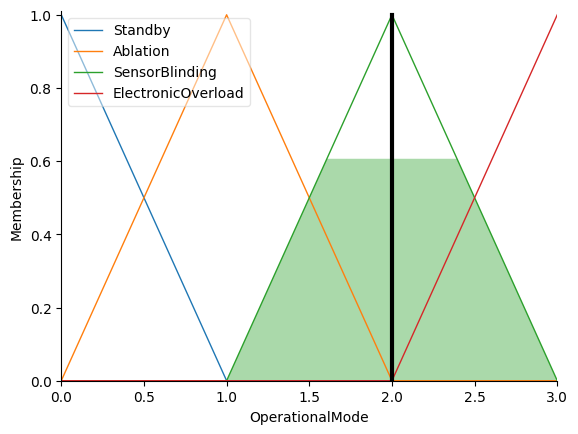

In [241]:
# Example 1: Low Wavelength, Medium PulsePower
archimedes_sim.input['Wavelength'] = 700
archimedes_sim.input['PulsePower'] = 2500
archimedes_sim.compute()
print("Example 1 Output:", archimedes_sim.output['OperationalMode'])


# Visualize the result
operationalMode.view(sim=archimedes_sim)
plt.savefig('example1_output.png')


# Example 2: Medium Wavelength, High PulsePower

Example 2 Output: 1.5351383180187905


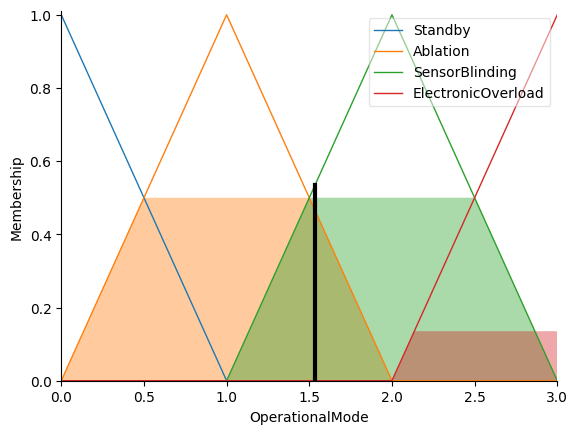

In [242]:
# Example 2
archimedes_sim.input['Wavelength'] = 1300
archimedes_sim.input['PulsePower'] = 3500
archimedes_sim.compute()
print("Example 2 Output:", archimedes_sim.output['OperationalMode'])


# Visualize the result
operationalMode.view(sim=archimedes_sim)
plt.savefig('example2_output.png')

# Example 3: High Wavelength, Low PulsePower

Example 3 Output: 0.33745173441700743


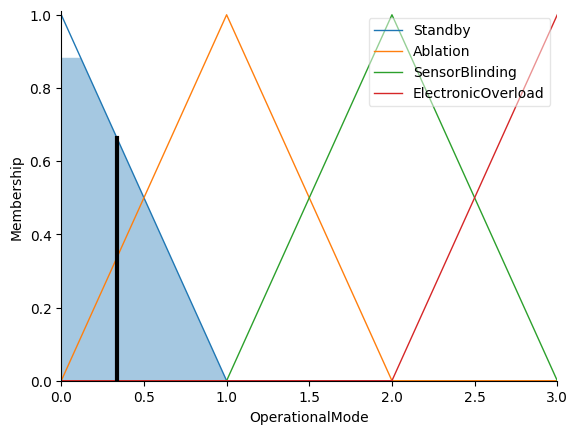

In [243]:
archimedes_sim.input['Wavelength'] = 1800  # High Wavelength
archimedes_sim.input['PulsePower'] = 500   # Low PulsePower
archimedes_sim.compute()

print("Example 3 Output:", archimedes_sim.output['OperationalMode'])
# Visualize the result
operationalMode.view(sim=archimedes_sim)
plt.savefig('example3_output.png')


# Example 4: Short Wavelength, High PulsePower

Example 4 Output: 1.0000000270296485


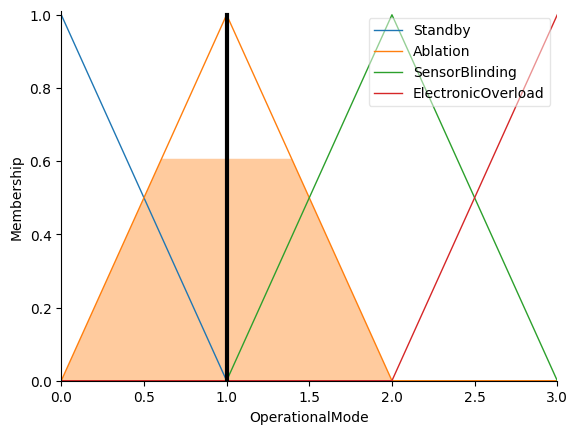

In [245]:
archimedes_sim.input['Wavelength'] = 500   # Short Wavelength
archimedes_sim.input['PulsePower'] = 4500  # High PulsePower
archimedes_sim.compute()

print("Example 4 Output:", archimedes_sim.output['OperationalMode'])
operationalMode.view(sim=archimedes_sim)  # Visualize the result
plt.savefig('example4_output.png')


# Example 5: Medium Wavelength, Medium PulsePower

Example 5 Output: 2.0


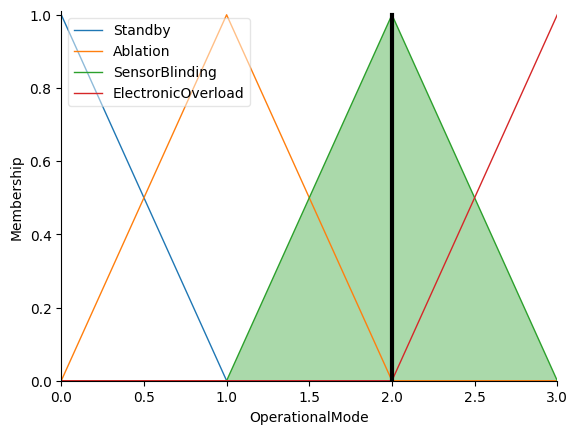

In [246]:
archimedes_sim.input['Wavelength'] = 1200  # Medium Wavelength
archimedes_sim.input['PulsePower'] = 2500  # Medium PulsePower
archimedes_sim.compute()

print("Example 5 Output:", archimedes_sim.output['OperationalMode'])
operationalMode.view(sim=archimedes_sim)  # Visualize the result
plt.savefig('example5_output.png')


# Example 6: Long Wavelength, Low PulsePower



Example 6 Output: 0.3333333333333333


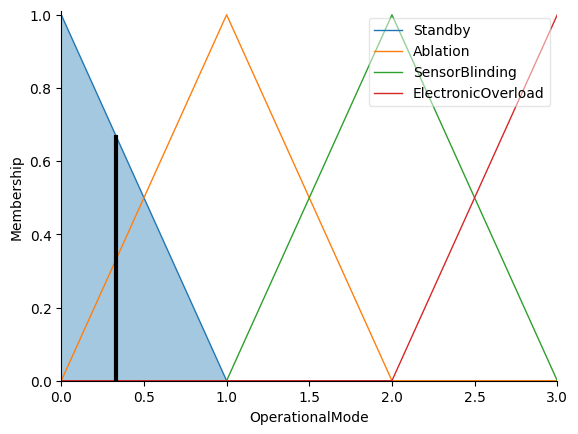

In [247]:
archimedes_sim.input['Wavelength'] = 1700  # Long Wavelength
archimedes_sim.input['PulsePower'] = 1000  # Low PulsePower
archimedes_sim.compute()

print("Example 6 Output:", archimedes_sim.output['OperationalMode'])
operationalMode.view(sim=archimedes_sim)  # Visualize the result
plt.savefig('example6_output.png')

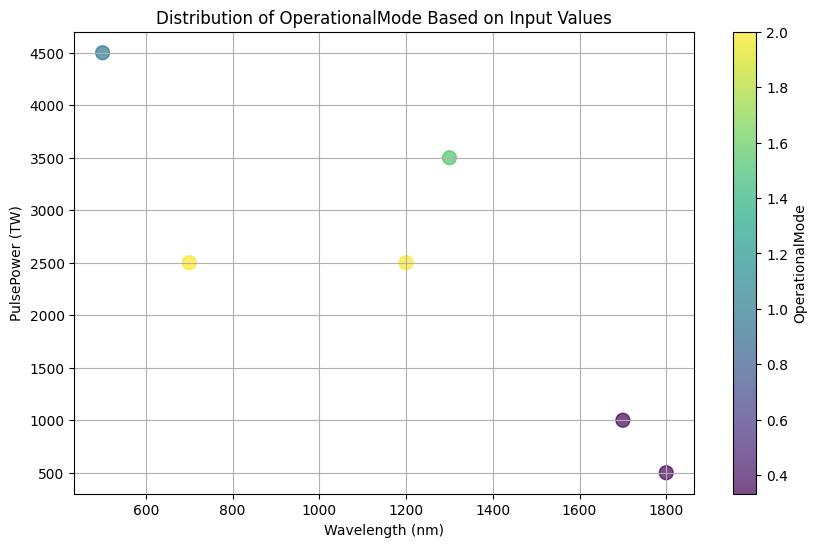

In [221]:
# Example Inputs
input_values = [
    (700, 2500),   # Example 1
    (1300, 3500),  # Example 2
    (1800, 500),   # Example 3
    (500, 4500),   # Example 4
    (1200, 2500),  # Example 5
    (1700, 1000)   # Example 6
]

# Corresponding OperationalMode outputs
output_modes = [1.9999999999999998, 1.5351383180187905, 0.33745173441700743,1.0000000270296485, 2.0, 0.3333333333333333]

# Create a scatter plot for the distribution
plt.figure(figsize=(10, 6))
plt.scatter([x[0] for x in input_values], [x[1] for x in input_values], c=output_modes, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='OperationalMode')
plt.xlabel('Wavelength (nm)')
plt.ylabel('PulsePower (TW)')
plt.title('Distribution of OperationalMode Based on Input Values')
plt.grid(True)
plt.show()


